<a href="https://colab.research.google.com/github/arwakhalidw/2024-GP-Group6/blob/main/CDRules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import defaultdict
from itertools import chain, combinations
from optparse import OptionParser
!pip install apriori_python
from apriori_python.utils import *
!pip install pandas mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz
from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt
import pickle

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# @title Reading and Copying the Dataset
# Read the dataset
dataset = pd.read_csv("All Subjects_CDR.csv")
# Copy the dataset
dataframe = dataset.copy() # to keep the original dataset unchanged

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# @title Check the Data Shape
dataframe.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(13453, 25)

In [ ]:
pd.set_option('display.max_columns', 25)  # Display all 25 columns
pd.set_option('display.width', 1000)  # Set width to fit all columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', 20)  # Adjust max column width
# @title Display the First 5 Rows
dataframe.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,CDSOURCE,CDVERSION,SPID,CDMEMORY,CDORIENT,CDJUDGE,CDCOMMUN,CDHOME,CDCARE,CDGLOBAL,CDRSB,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,107,2005-08-17,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00...
1,ADNI1,011_S_0003,3,sc,sc,2005-08-18,1.0,NaN,NaN,1.0,1.0,1.0,1.0,0.5,0.0,1.0,4.5,10,107,2005-08-18,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00...
2,ADNI1,022_S_0004,4,sc,sc,2005-08-18,1.0,NaN,NaN,0.5,0.0,0.5,0.0,0.0,0.0,0.5,1.0,12,10,2005-08-18,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00...
3,ADNI1,011_S_0005,5,sc,sc,2005-08-23,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,107,2005-08-23,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00...
4,ADNI1,022_S_0007,7,sc,sc,2005-08-25,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,16,10,2005-08-25,2009-10-05,NaN,NaN,NaN,2009-10-05 00:00...


In [ ]:
# @title Delete unnecessary columns
dataframe = dataframe.drop(columns=['PHASE', 'PTID', 'RID', 'VISCODE', 'VISCODE2', 'VISDATE', 'CDSOURCE', 'CDVERSION', 'SPID', 'CDRSB', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'HAS_QC_ERROR', 'update_stamp'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# @title Display the First 5 Rows after deletion
dataframe.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CDMEMORY,CDORIENT,CDJUDGE,CDCOMMUN,CDHOME,CDCARE,CDGLOBAL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.5,0.0,1.0
2,0.5,0.0,0.5,0.0,0.0,0.0,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# @title Check if Any Column has Null values in the Dataset
dataframe.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
CDMEMORY,79
CDORIENT,79
CDJUDGE,79
CDCOMMUN,80
CDHOME,80
CDCARE,80
CDGLOBAL,84


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


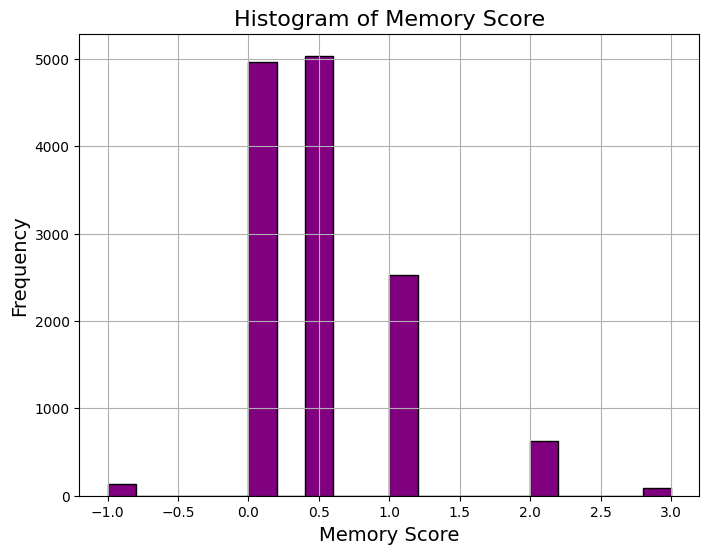

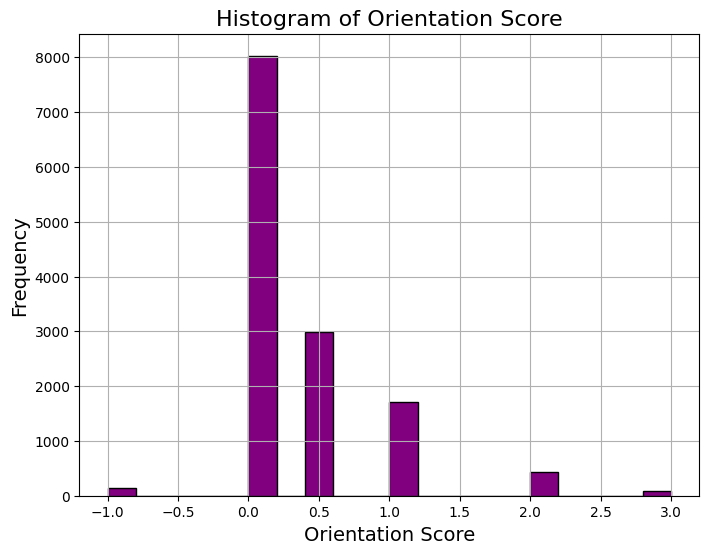

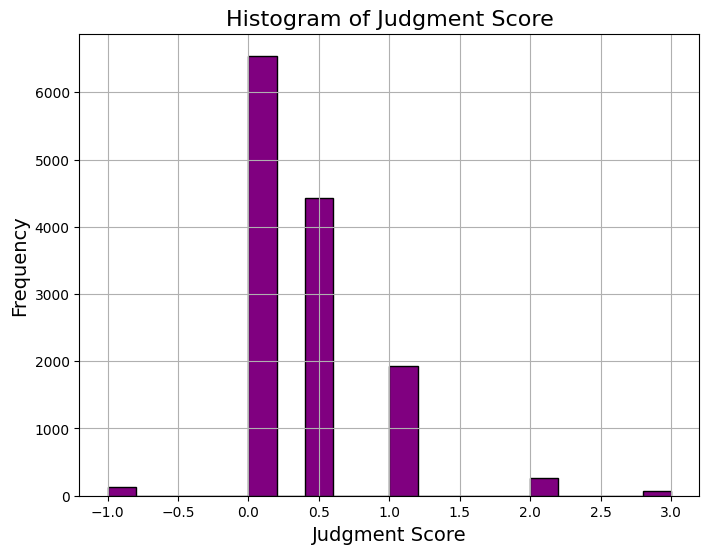

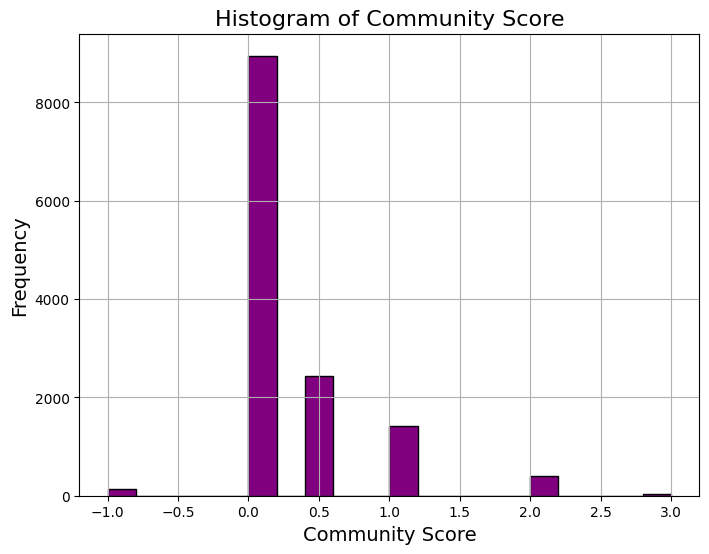

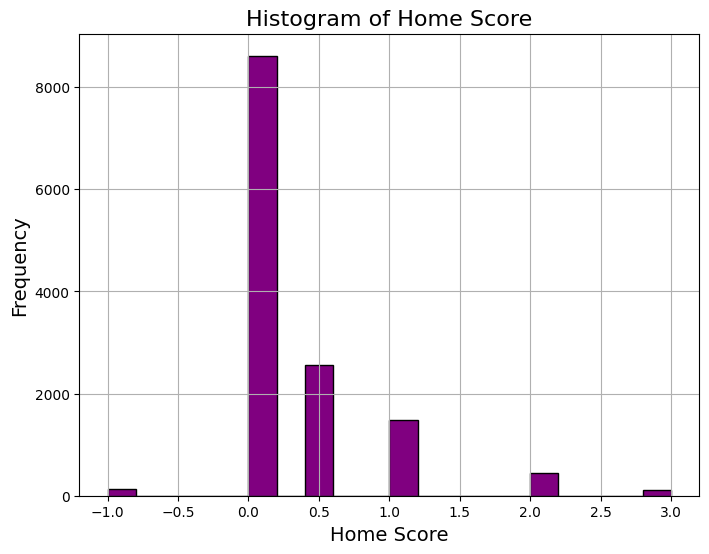

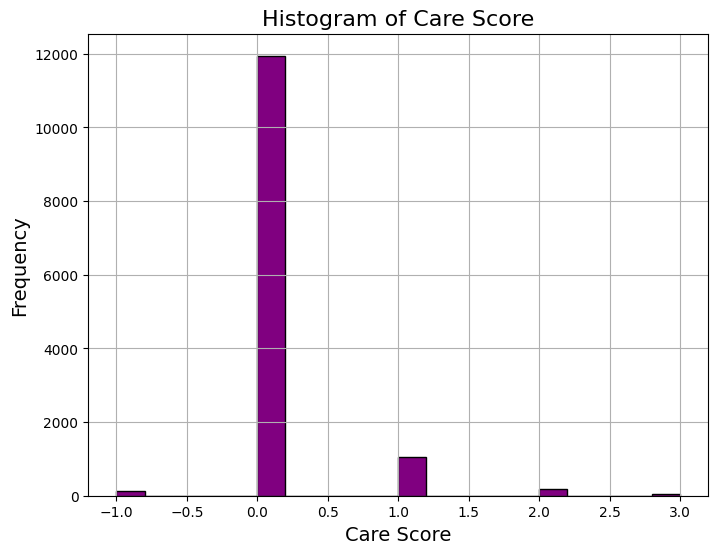

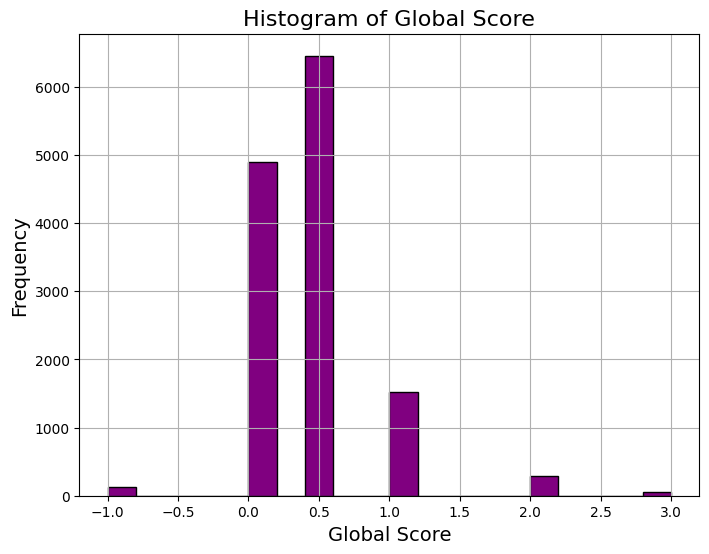

In [ ]:
def visualize(data, column_name):
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, color='purple', edgecolor='black')
    plt.title(f'Histogram of {column_name}', fontsize=16)  # Increase title font size
    plt.xlabel(column_name, fontsize=14)  # Increase x-axis label font size
    plt.ylabel('Frequency', fontsize=14)  # Increase y-axis label font size
    plt.grid(True)
    plt.show()

# Call visualize function for each column
visualize(dataframe['CDMEMORY'], 'Memory Score')
visualize(dataframe['CDORIENT'], 'Orientation Score')
visualize(dataframe['CDJUDGE'], 'Judgment Score')
visualize(dataframe['CDCOMMUN'], 'Community Score')
visualize(dataframe['CDHOME'], 'Home Score')
visualize(dataframe['CDCARE'], 'Care Score')
visualize(dataframe['CDGLOBAL'], 'Global Score')

In [ ]:
# @title delete negative and null rows
df_cleaned = dataframe[dataframe >= 0].dropna()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#  @title check if there is any negative values
# Check if all values are non-negative
all_non_negative = (df_cleaned >= 0).all().all()

if all_non_negative:
    print("The DataFrame does not contain negative values.")
else:
    print("The DataFrame contains negative values.")

The DataFrame does not contain negative values.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# @title Check if Any Column has Null values in the Dataset
df_cleaned.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
CDMEMORY,0
CDORIENT,0
CDJUDGE,0
CDCOMMUN,0
CDHOME,0
CDCARE,0
CDGLOBAL,0


In [ ]:
# @title Check the Data Shape
df_cleaned.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(13234, 7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


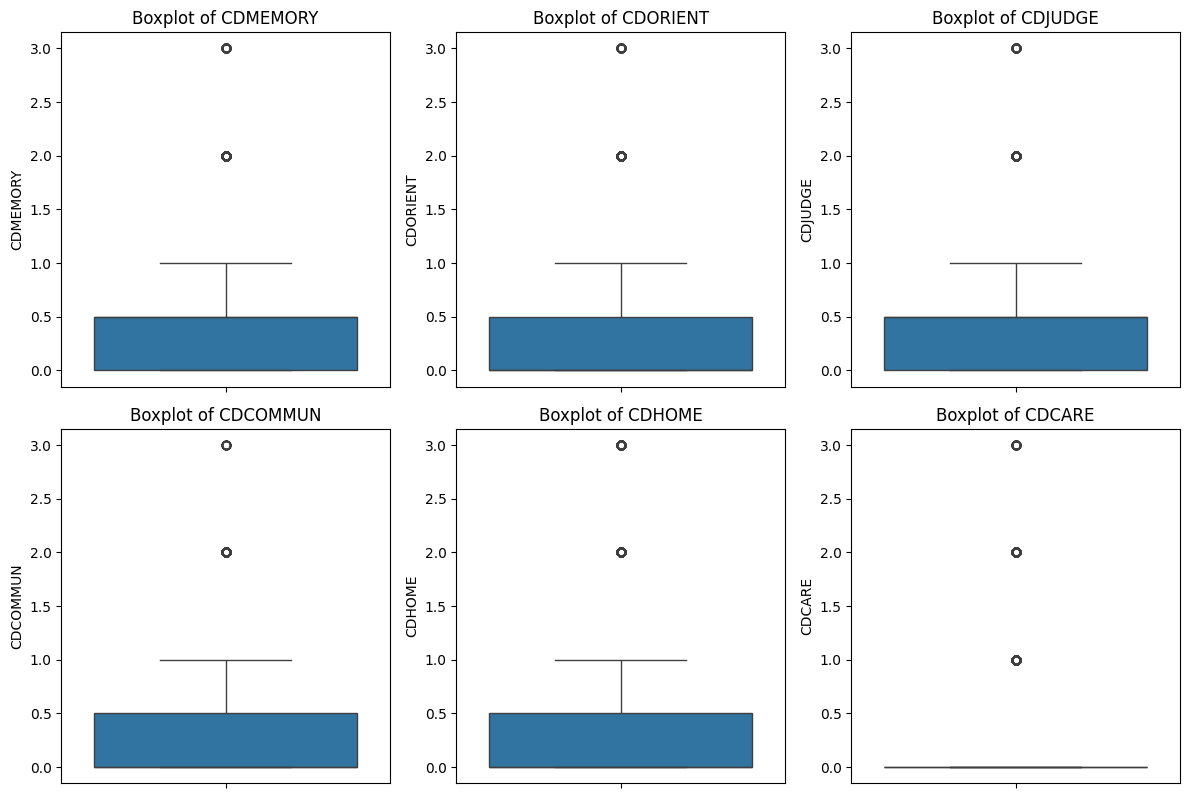

In [ ]:
numeric_features = ['CDMEMORY', 'CDORIENT', 'CDJUDGE', 'CDCOMMUN','CDHOME','CDCARE']
std_dev=3

plt.figure(figsize=(12, 12))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df_cleaned[feature])
    plt.title(f'Boxplot of {feature}')


# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Decision tree

In [ ]:
#split dataset in features and target variable
feature_cols = ['CDMEMORY', 'CDORIENT', 'CDJUDGE', 'CDCOMMUN','CDHOME','CDCARE']

def value(x):
    if x == 0.5:
        return "Questionable 0.5"
    elif x == 1:
        return "Mild 1"
    elif x == 2:
        return "Moderate 2"
    elif x == 3:
        return "Severe 3"
    else:
        return "None 0"


df_cleaned['CDGLOBAL'] = df_cleaned['CDGLOBAL'].apply(value)
X = df_cleaned[feature_cols] # Features
y = df_cleaned['CDGLOBAL'] # Target variable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Gini

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
# Use 'weighted' average for multiclass precision
print("Precision:",metrics.precision_score(y_test, y_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
# Use 'weighted' average for multiclass recall
print("Recall:",metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.993704356585243
Precision: 0.9936873215509928
Recall: 0.993704356585243


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


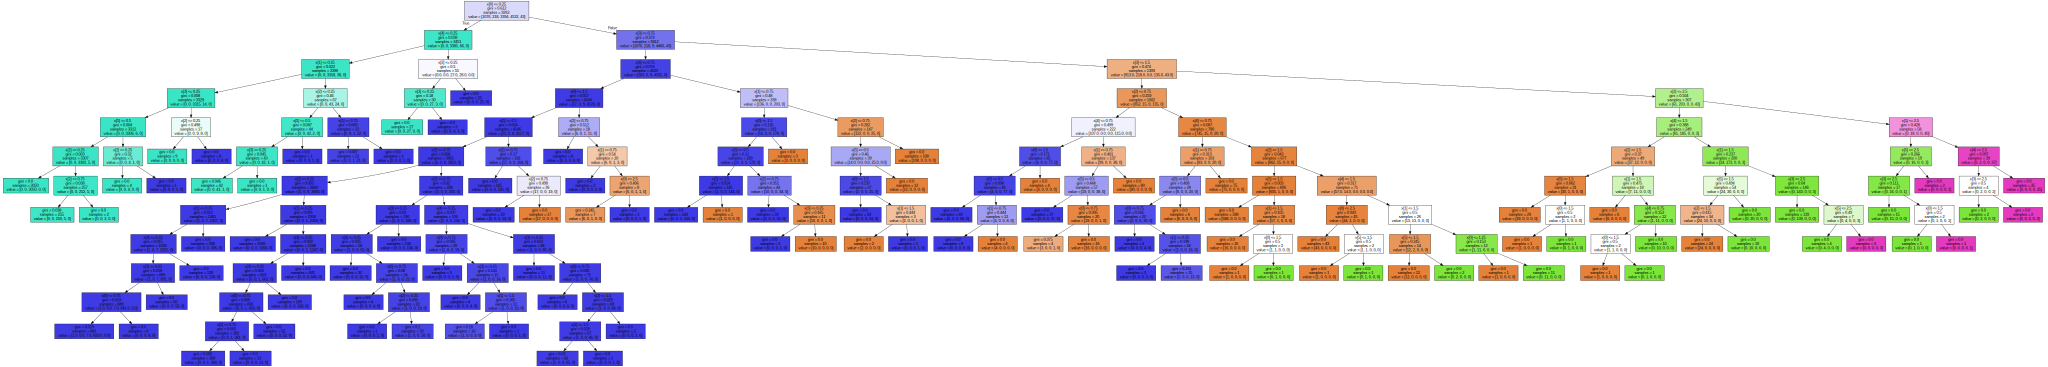

In [ ]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph


# Info gain (entropy)

In [ ]:
# Create Decision Tree classifer object
clfI = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clfI = clfI.fit(X_train,y_train)

#Predict the response for test dataset
y_predI = clfI.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predI))

Accuracy: 0.9944598337950139


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
# Use 'weighted' average for multiclass precision
print("Precision:",metrics.precision_score(y_test, y_predI, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
# Use 'weighted' average for multiclass recall
print("Recall:",metrics.recall_score(y_test, y_predI, average='weighted'))

Precision: 0.9944387415055163
Recall: 0.9944598337950139


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


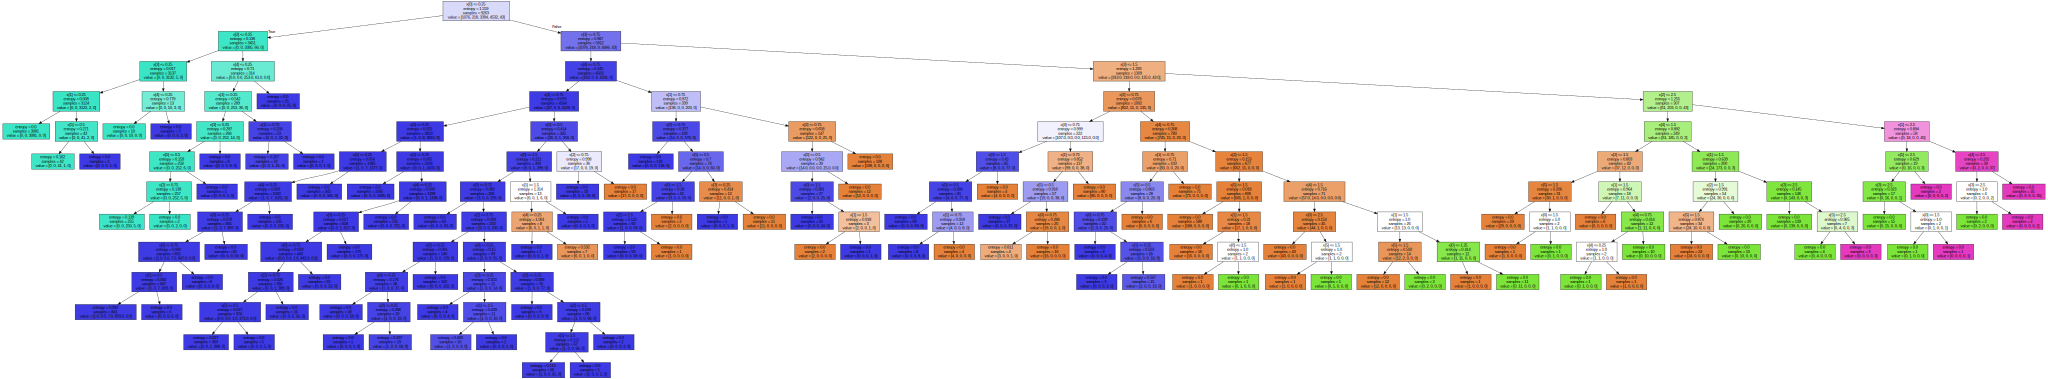

In [ ]:
# DOT data
dot_data = tree.export_graphviz(clfI, out_file=None,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

# Validate

## gini

In [ ]:
new_data = pd.DataFrame({
    'CDMEMORY': [1,2],
    'CDORIENT': [1,1],
    'CDJUDGE': [0.5,2],
    'CDCOMMUN': [1,2],
    'CDHOME': [1,2],
    'CDCARE': [0,1]
}) ## [1 mild,2 moderate]

# Make predictions on the new data
predictions = clf.predict(new_data)

# Display the predictions
print("Predicted classes for new data:", predictions)

Predicted classes for new data: ['Mild 1' 'Moderate 2']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# info gain

In [ ]:
# Make predictions on the new data
predictions = clfI.predict(new_data)

# Display the predictions
print("Predicted classes for new data:", predictions)

Predicted classes for new data: ['Mild 1' 'Moderate 2']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def apriori(itemSetList, minSup, minConf):
    C1ItemSet = getItemSetFromList(itemSetList)
    # Final result global frequent itemset
    globalFreqItemSet = dict()
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(
        C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(
            candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2])

    return globalFreqItemSet, rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
globalscore, rules= apriori(df_cleaned.values.tolist(), minSup=0, minConf=0)
from tabulate import tabulate
print(tabulate(globalscore, headers='firstrow', tablefmt='grid'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


+---------------------------------+----------------------------------------+-------------------------------------------+------------------------------------------------+-----------------------------------------------------+
| frozenset({2.0})                | frozenset({'Questionable 0.5', 3.0})   | frozenset({1.0, 'None 0', 2.0})           | frozenset({0.5, 1.0, 2.0, 0.0})                | frozenset({0.5, 1.0, 2.0, 0.0, 'Mild 1'})           |
+=================================+========================================+===========================================+================================================+=====================================================+
| frozenset({0.5})                | frozenset({2.0, 3.0})                  | frozenset({1.0, 'Questionable 0.5', 2.0}) | frozenset({0.5, 1.0, 3.0, 'Moderate 2'})       | frozenset({0.0, 1.0, 2.0, 3.0, 'Mild 1'})           |
+---------------------------------+----------------------------------------+----------------------------

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
